# Halo mass function

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from compos import const, growthfactor
from MgIIabs.model import halomassfunc
from astropy.units.astrophys import M_sun,Mpc
from scipy.optimize import minimize
import astropy.units as u
from astropy.constants import G as grav

In [2]:
const.initializecosmo()
z=0

M = 1e12/const.cosmo['h']
H0 = 100*u.km/u.s/Mpc
rho_crit0 = (3*H0**2/(8*np.pi*grav)).to(M_sun/Mpc**3)
rho_m = const.cosmo['omega_0']*rho_crit0*(1+z)**3

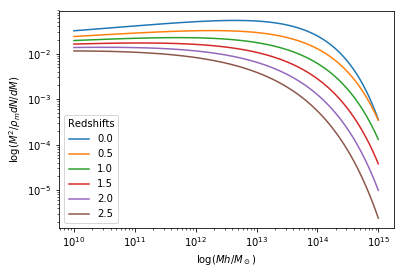

In [4]:
M = 10**np.linspace(10,15,100)*M_sun #Units of h^-1 M_sun
import pdb
plots = []
for z in np.linspace(0,2.5,6):
    growthf = growthfactor.growfunc_z(z)
    rho_m = const.cosmo['omega_0']*rho_crit0*(1+z)**3
    dndM = [halomassfunc.dNdM(mass,z,growthf=growthf)*mass**2/rho_m for mass in M]
    #pdb.set_trace()
    plt.loglog(M.value,dndM,label='{:1.1f}'.format(z))
plt.legend(title='Redshifts')
plt.ylabel(r'$\log (M^2/\rho_m dN/dM)$')
plt.xlabel(r'$\log(Mh/M_\odot)$')
plt.show()

In [3]:
import hmf
help(hmf.MassFunction)

Help on class MassFunction in module hmf.hmf:

class MassFunction(hmf.transfer.Transfer)
 |  An object containing all relevant quantities for the mass function.
 |  
 |  The purpose of this class is to calculate many quantities associated with
 |  the dark matter halo mass function (HMF). The class is initialized to form a
 |  cosmology and takes in various options as to how to calculate all
 |  further quantities.
 |  
 |  All required outputs are provided as ``@property`` attributes for ease of
 |  access.
 |  
 |  Contains an update() method which can be passed arguments to update, in the
 |  most optimal manner. All output quantities are calculated only when needed
 |  (but stored after first calculation for quick access).
 |  
 |  In addition to the parameters directly passed to this class, others are available
 |  which are passed on to its superclass. To read a standard documented list of (all) parameters,
 |  use ``MassFunction.parameter_info()``. If you want to just see the pl

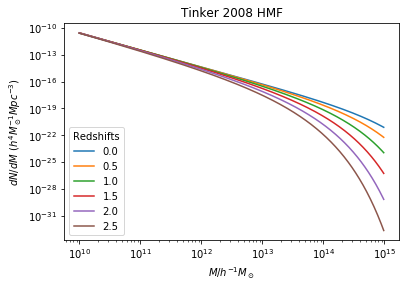

In [28]:
for z in np.linspace(0,2.5,6):
    mass_func = hmf.MassFunction(z=z,Mmax=15)
    #*mass_func.m**2/mass_func.mean_density 
    plt.loglog(mass_func.m,mass_func.dndm,label=str(z))
plt.legend(title="Redshifts")
plt.title("Tinker 2008 HMF")
plt.ylabel(r"$dN/dM$ $(h^4M_\odot^{-1}Mpc^{-3})$")
plt.xlabel("$M/h^{-1}M_\odot$")
plt.show()

In [24]:
mass_func = hmf.MassFunction()
mass_func.update(z=1)
mass_func.mean_density/mass_func.mean_density0

8.0

In [34]:
mass_func.sigma_8

0.8159